In [73]:
from patchedimage import PatchedImage
from utilities import *

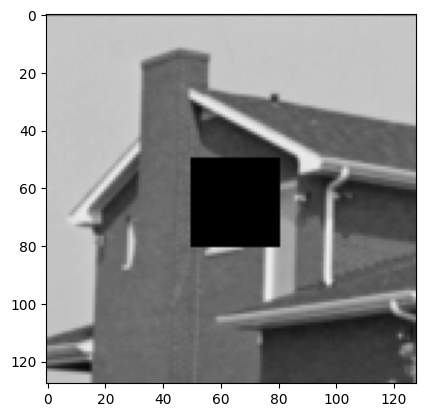

In [89]:
imgp = PatchedImage("images/maison-petit.tif",4)
#imgp.set_masque(masque_circulaire((50,50),15,imgp.img.shape))
imgp.set_masque(masque_carre((50,50),(80,80),imgp.img.shape))#+masque_circulaire((20,50),15,imgp.img.shape))
imgp.set_priorities()
imgp.show_img()

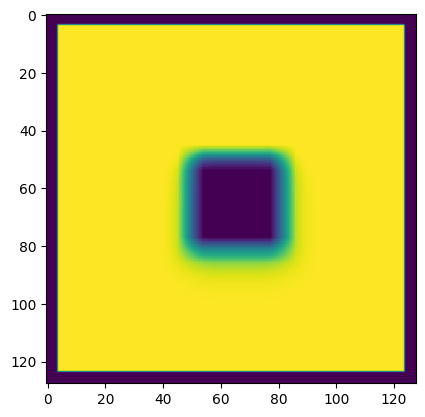

In [90]:
plt.imshow(imgp.priority); # pourquoi pas la meme priorité sur les bors de l'image (haut/gauche et bas/droite)
#plt.xlim(30, 70)
#plt.ylim(30, 70)

In [91]:
def find_nearest_patch(imgp,coord):
    dmin = np.inf
    patch = imgp.get_patch((coord[0],coord[1]))
    img = imgp.img
    masque = 1 -(patch == 0)
    for i in range(imgp.size,img.shape[0]-imgp.size):
        for j in range(imgp.size,img.shape[1]-imgp.size):
            pat = imgp.get_patch((i,j))
            patm = pat * masque
            d = np.linalg.norm(patch-patm)
            if d < dmin and (not (i,j) in imgp.outlines_target(4)):
                dmin = d
                p = (i,j)
                patmin = pat * (1-masque)
    return p,patmin


In [92]:
def reconstruction(imgp,coord):
    coo,pato = find_nearest_patch(imgp,coord)

    recons = imgp.get_patch(coord)+pato
    imgp.set_patch(coord,recons)
    #imgp.show_img()

In [93]:
for i in range(50,80):
    reconstruction(imgp,(50,i))
    reconstruction(imgp,(80,i))
    reconstruction(imgp,(50,i))
    reconstruction(imgp,(50,i))

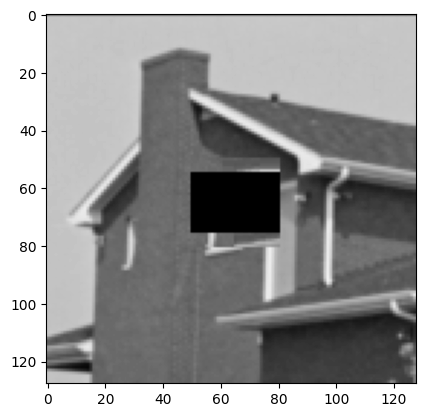

In [94]:
imgp.show_img()